### IMPORTING LIBRARIES

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Reading the CSV File
pp_adult_data = pd.read_csv('preprocessed_dataset/preprocessed_adult_data.csv')
pp_adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.00000,1867.898388,40,United-States,<=50K,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3403.72118,1867.898388,13,United-States,<=50K,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,3403.72118,1867.898388,40,United-States,<=50K,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,3403.72118,1867.898388,40,United-States,<=50K,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,3403.72118,1867.898388,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29254,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,3403.72118,1867.898388,38,United-States,<=50K,0
29255,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3403.72118,1867.898388,40,United-States,>50K,1
29256,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,3403.72118,1867.898388,40,United-States,<=50K,0
29257,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,3403.72118,1867.898388,20,United-States,<=50K,0


### ENCODING CATEGORICAL VALUES

In [15]:
# Encoding columns for scaling the dataframe
le=LabelEncoder()
pp_adult_data["workclass"]=le.fit_transform(pp_adult_data["workclass"])
pp_adult_data["education"]=le.fit_transform(pp_adult_data["education"])
pp_adult_data["education-num"]=le.fit_transform(pp_adult_data["education-num"])
pp_adult_data["marital-status"]=le.fit_transform(pp_adult_data["marital-status"])
pp_adult_data["occupation"]=le.fit_transform(pp_adult_data["occupation"])
pp_adult_data["race"]=le.fit_transform(pp_adult_data["race"])
pp_adult_data["sex"]=le.fit_transform(pp_adult_data["sex"])
pp_adult_data["native-country"]=le.fit_transform(pp_adult_data["native-country"])
pp_adult_data["relationship"]=le.fit_transform(pp_adult_data["relationship"])
pp_adult_data["income"]=le.fit_transform(pp_adult_data["income"])
pp_adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39.0,5,77516,9,12,4,0,1,4,1,2174.00000,1867.898388,40,38,0,0
1,50.0,4,83311,9,12,2,3,0,4,1,3403.72118,1867.898388,13,38,0,0
2,38.0,2,215646,11,8,0,5,1,4,1,3403.72118,1867.898388,40,38,0,0
3,53.0,2,234721,1,6,2,5,0,2,1,3403.72118,1867.898388,40,38,0,0
4,28.0,2,338409,9,12,2,9,5,2,0,3403.72118,1867.898388,40,4,0,0


<Axes: >

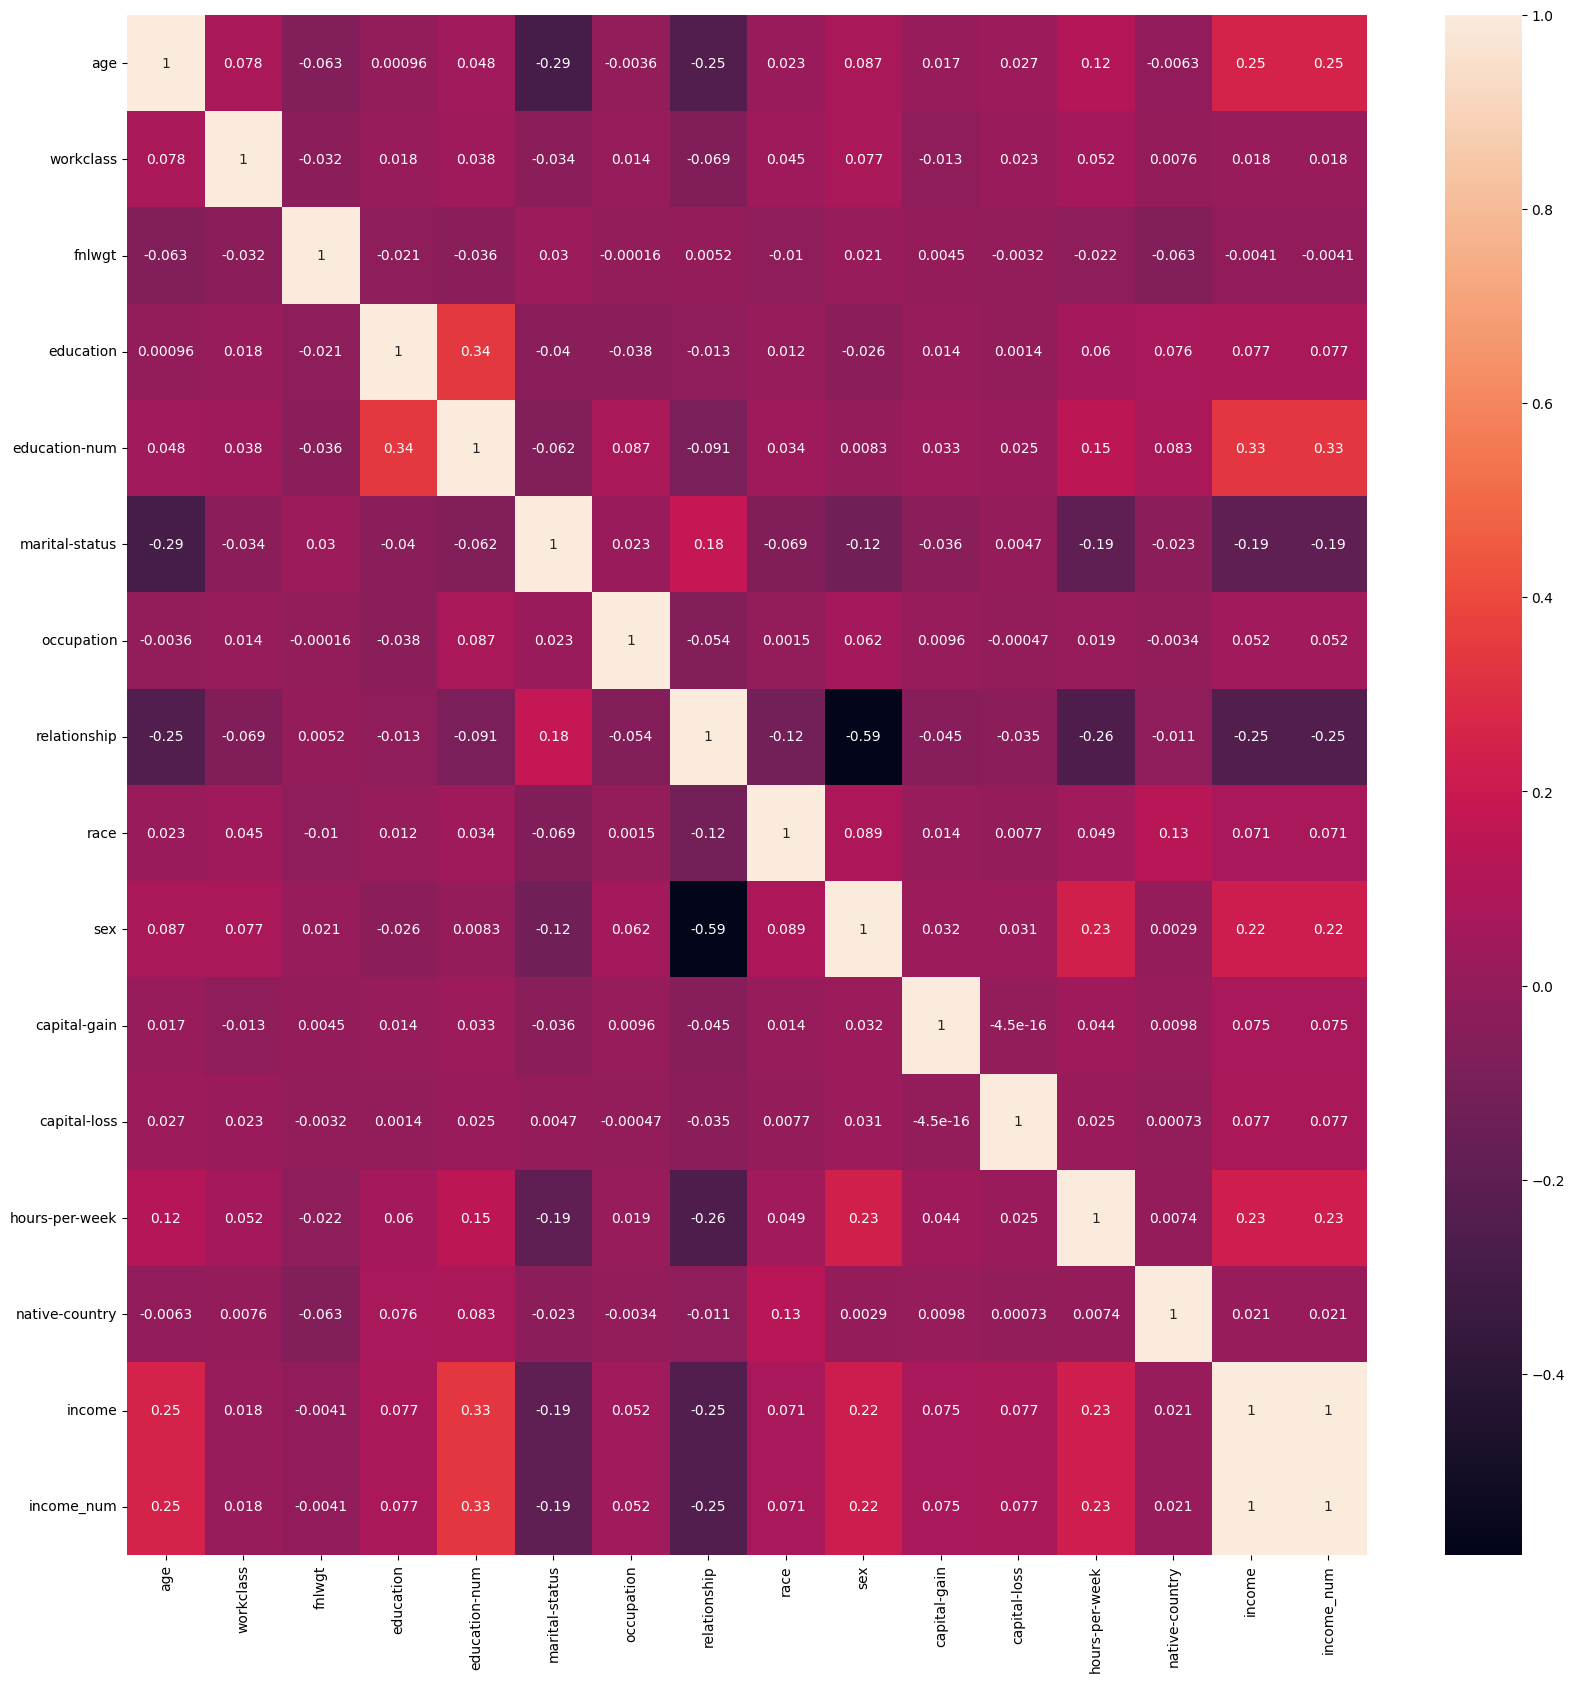

In [16]:
# Heatmap of correlation matrix.
plt.figure(figsize=(20,20))
sns.heatmap(pp_adult_data.corr(),annot=True)

#### NORMALIZATION (Scaling of values - MinMaxScalar)

In [17]:
# Removing income columns.
pp_adult_data = pp_adult_data.drop('income', axis = 1)

In [18]:
# As it is classification model, we use MinMaxScalar for normalizing of dataframe.
scala = MinMaxScaler(feature_range=(0,1))
pp_adult_data = scala.fit_transform(pp_adult_data)
pp_adult_data = pd.DataFrame(pp_adult_data)
pp_adult_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.379310,0.833333,0.157854,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.367398,0.407736,0.397959,0.95,0.0
1,0.568966,0.666667,0.172204,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.586717,0.407736,0.122449,0.95,0.0
2,0.362069,0.333333,0.499898,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.586717,0.407736,0.397959,0.95,0.0
3,0.620690,0.333333,0.547133,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.586717,0.407736,0.397959,0.95,0.0
4,0.189655,0.333333,0.803891,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.586717,0.407736,0.397959,0.10,0.0


In [19]:
# Displaying count, mean, standard deviation, minimum, 25/50/75 percentile, maximum of all int columns.
pp_adult_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000,29259.000000
mean,0.367142,0.366873,0.411065,0.689784,0.609021,0.429446,0.458392,0.283345,0.920452,0.674015,0.586717,0.407735,0.407671,0.910397,0.249701
std,0.219529,0.159033,0.216857,0.253459,0.169307,0.249955,0.310015,0.320383,0.208751,0.468750,0.043823,0.018743,0.122460,0.151902,0.432847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189655,0.333333,0.253492,0.600000,0.533333,0.333333,0.153846,0.000000,1.000000,0.000000,0.586717,0.407736,0.397959,0.950000,0.000000
50%,0.344828,0.333333,0.401656,0.733333,0.600000,0.333333,0.461538,0.200000,1.000000,1.000000,0.586717,0.407736,0.397959,0.950000,0.000000
75%,0.517241,0.333333,0.533595,0.800000,0.800000,0.666667,0.692308,0.600000,1.000000,1.000000,0.586717,0.407736,0.448980,0.950000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### TRAIN/TEST SPLIT

In [20]:
# Splitting x as source(table of column 0-13) to predict target variable y(column 14)
x = pp_adult_data.drop([14],axis=1)
y = pp_adult_data[14]

In [21]:
# Splitting train, test variables, where test is 20% of the dataframe.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape

((23407, 14), (5852, 14))

In [22]:
# Balancing the train data to maintain the fairness and to reduce the bias of this model using SMOTE over sampling.
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 5877
Before OverSampling, counts of label '0': 17530
After OverSampling, counts of label '1': 17530
After OverSampling, counts of label '0': 17530


In [23]:
X_train.shape, X_test.shape

((35060, 14), (5852, 14))

In [24]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.224138,0.333333,0.630964,0.733333,0.533333,0.666667,0.153846,0.8,0.25,1.0,0.586717,0.407736,0.397959,0.975
1,0.103448,0.333333,0.809175,0.600000,0.800000,0.666667,0.230769,0.2,1.00,0.0,0.586717,0.407736,0.377551,0.950
2,0.793103,0.666667,0.380679,1.000000,0.600000,0.333333,0.692308,1.0,1.00,0.0,0.586717,0.407736,0.091837,0.950
3,0.327586,0.666667,0.761460,0.600000,0.800000,0.333333,0.307692,0.0,1.00,1.0,0.586717,0.407736,0.500000,0.950
4,0.931034,0.666667,0.160999,0.333333,0.200000,0.333333,0.307692,0.0,1.00,1.0,0.586717,0.407736,0.091837,0.950


### MODEL TRAINING & MODEL PERFORMANCE METRICS

### NAÏVE BAYES

In [25]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.7337662337662337
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.80      4423
         1.0       0.47      0.76      0.58      1429

    accuracy                           0.73      5852
   macro avg       0.69      0.74      0.69      5852
weighted avg       0.80      0.73      0.75      5852



Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.807


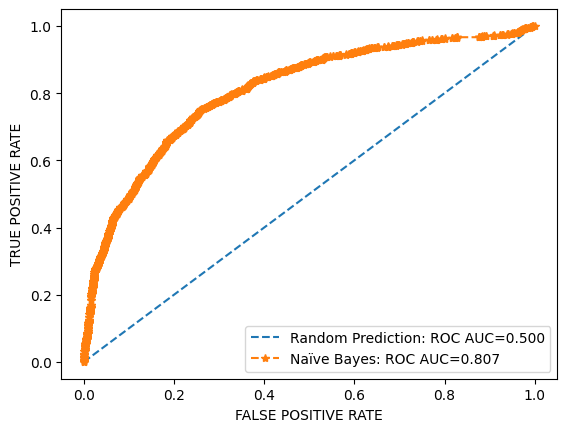

In [26]:
# Predict probabilities
nb_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


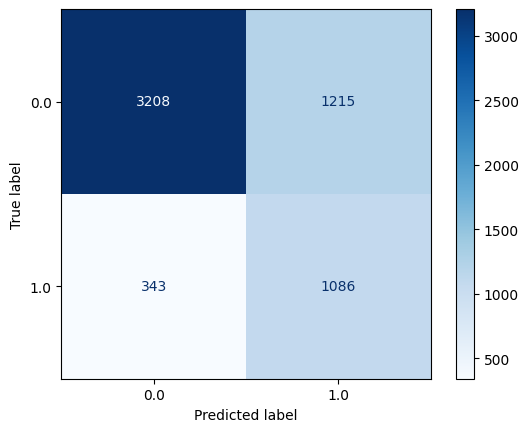

In [27]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### RANDOM FOREST

In [28]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'max_depth': [None, 10, 20, 30], # Depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required at each leaf node
}

# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8768120291734965


In [29]:
# Evaluate the best model obtained from Grid Search
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.8250170881749829
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      4423
         1.0       0.63      0.68      0.65      1429

    accuracy                           0.83      5852
   macro avg       0.76      0.77      0.77      5852
weighted avg       0.83      0.83      0.83      5852



Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.877


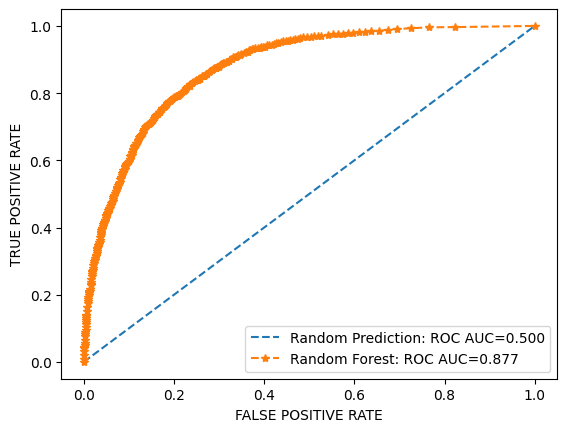

In [30]:
# Predict probabilities
rf_probs = grid_search.best_estimator_.predict_proba(X_test)
# Keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

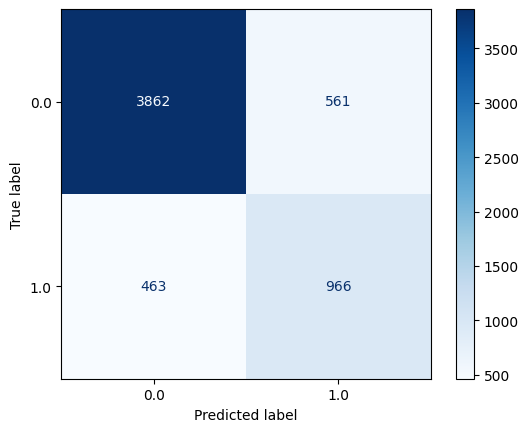

In [31]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### COMPARING THE TWO MODELS

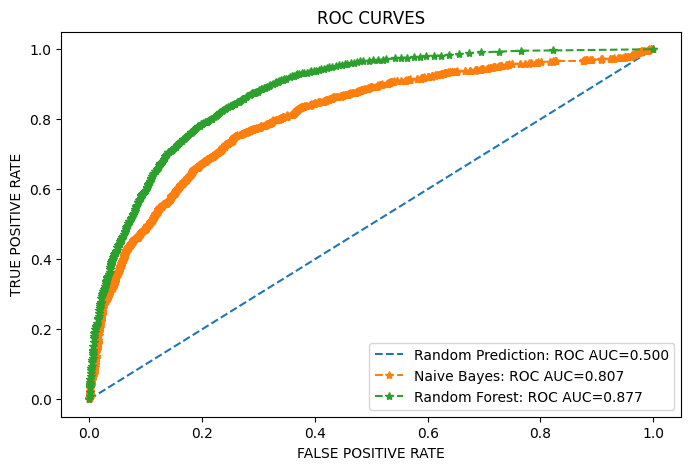

In [32]:
plt.figure(figsize=(8,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))

plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
plt.legend()
plt.show()

In [33]:
random_forest_accuracy = grid_search.score(X_test, y_test)
naïve_bayes_accuracy = model.score(X_test, y_test)

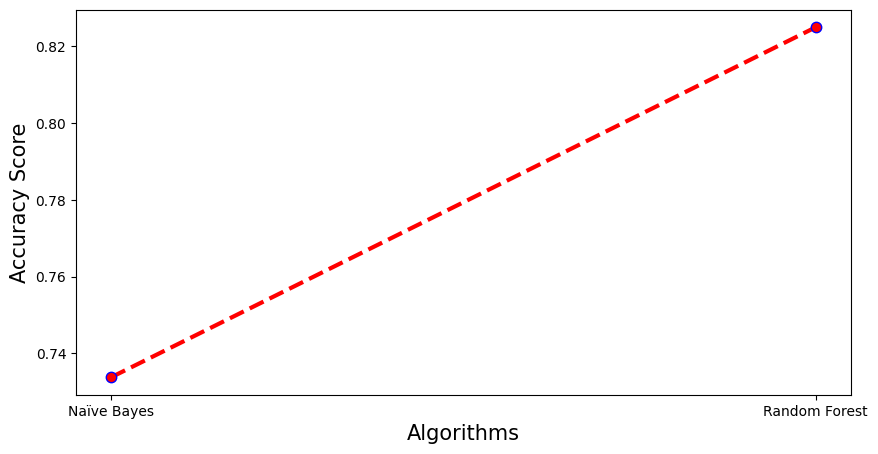

In [34]:
# Comparing Different algorithm models with their respective accuracy.
x=['Naïve Bayes','Random Forest']
y=[naïve_bayes_accuracy, random_forest_accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show() 